In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.13.0'

In [3]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x=data.iloc[:,3:-1].values
y=data.iloc[:,-1].values

In [5]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
x[:,2]=le.fit_transform(x[:,2])

In [8]:
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# remainder="passthrough" Bu parametre, dönüşüme tabi tutulmayan sütunların ne yapılacağını belirtir.
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[1])],remainder="passthrough")
x=np.array(ct.fit_transform(x))

In [10]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain1=sc.fit_transform(xtrain)
xtest1=sc.transform(xtest)

In [13]:
x.shape

(10000, 12)

In [14]:
ann=tf.keras.models.Sequential()

In [15]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu",input_dim=12))

In [16]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [17]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [18]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [19]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
history = ann.fit(xtrain1, ytrain, batch_size=32, epochs=100, validation_data=(xtest1, ytest))

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5204 - accuracy: 0.7956 - val_loss: 0.4689 - val_accuracy: 0.8045
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8006 - val_loss: 0.4388 - val_accuracy: 0.8140
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8050 - val_loss: 0.4237 - val_accuracy: 0.8185
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8130 - val_loss: 0.4122 - val_accuracy: 0.8215
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8205 - val_loss: 0.3989 - val_accuracy: 0.8270
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8282 - val_loss: 0.3880 - val_accuracy: 0.8355
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8330 - val_loss: 0.3792 - val_accuracy: 0.8405

Epoch 58/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8625 - val_loss: 0.3356 - val_accuracy: 0.8615
Epoch 59/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8622 - val_loss: 0.3370 - val_accuracy: 0.8635
Epoch 60/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8621 - val_loss: 0.3360 - val_accuracy: 0.8630
Epoch 61/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8652 - val_loss: 0.3362 - val_accuracy: 0.8635
Epoch 62/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8646 - val_loss: 0.3365 - val_accuracy: 0.8655
Epoch 63/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8634 - val_loss: 0.3360 - val_accuracy: 0.8630
Epoch 64/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8633 - val_loss: 0.3356 - val_accuracy:

In [20]:


# Son epoch'un kayıp ve doğruluk değerlerini yazdır
final_loss = history.history['loss'][-1]
final_accuracy = history.history['accuracy'][-1]
print(f"Final Loss: {final_loss}, Final Accuracy: {final_accuracy}")


Final Loss: 0.3310633599758148, Final Accuracy: 0.8631250262260437


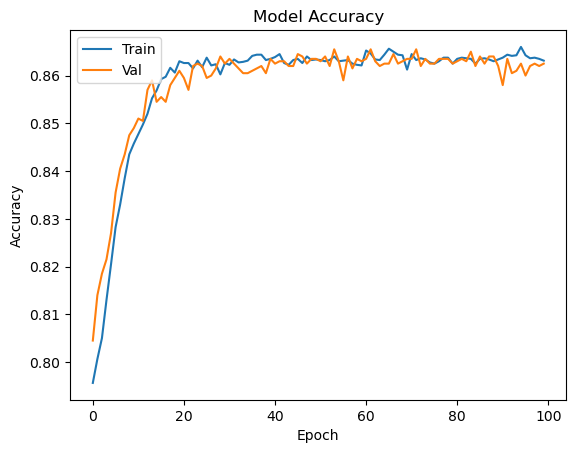

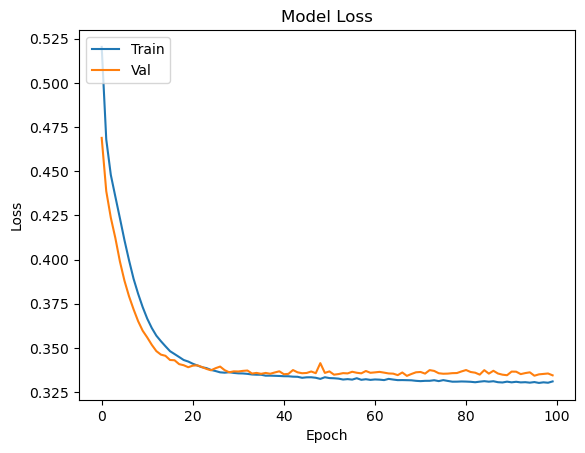

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [22]:
tahmin=ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))

1/1 [==============================] - 0s 109ms/step


In [23]:
print(tahmin>0.5)

[[False]]


In [24]:
"""from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(xtrain1,ytrain)
yhead=dc.predict(xtest1)
dc.score(xtest1,ytest)"""

'from sklearn.tree import DecisionTreeClassifier\ndc=DecisionTreeClassifier()\ndc.fit(xtrain1,ytrain)\nyhead=dc.predict(xtest1)\ndc.score(xtest1,ytest)'

In [20]:
"""ypred=ann.predict(xtest1)
ypred=(ypred>0.5)
print(np.concatenate((ypred.reshape(len(ypred),1),ytest.reshape(len(ytest),1)),1))"""


'ypred=ann.predict(xtest1)\nypred=(ypred>0.5)\nprint(np.concatenate((ypred.reshape(len(ypred),1),ytest.reshape(len(ytest),1)),1))'

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(ytest,ypred)
print(cm)
print(accuracy_score(ytest,ypred))